In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import pickle
import numpy
from scipy import interpolate
from galpy.util import bovy_conversion, bovy_plot, save_pickles
import gd1_util
from gd1_util import R0, V0
import seaborn as sns
from matplotlib import cm, pyplot
import simulate_streampepper
%pylab inline
save_figures= False

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# Some figures of the properties of the mock GD1-like stream

In [3]:
# Load the smooth and peppered stream
sdf_smooth= gd1_util.setup_gd1model()
pepperfilename= 'gd1pepper.pkl'
if os.path.exists(pepperfilename):
    with open(pepperfilename,'rb') as savefile:
        sdf_pepper= pickle.load(savefile)
else:
    timpacts= simulate_streampepper.parse_times('256sampling')
    sdf_pepper= gd1_util.setup_gd1model(timpact=timpacts,
                                        hernquist=True)
    save_pickles(pepperfilename,sdf_pepper)

Sky position, relation to $\Delta \theta_\parallel$, and density:

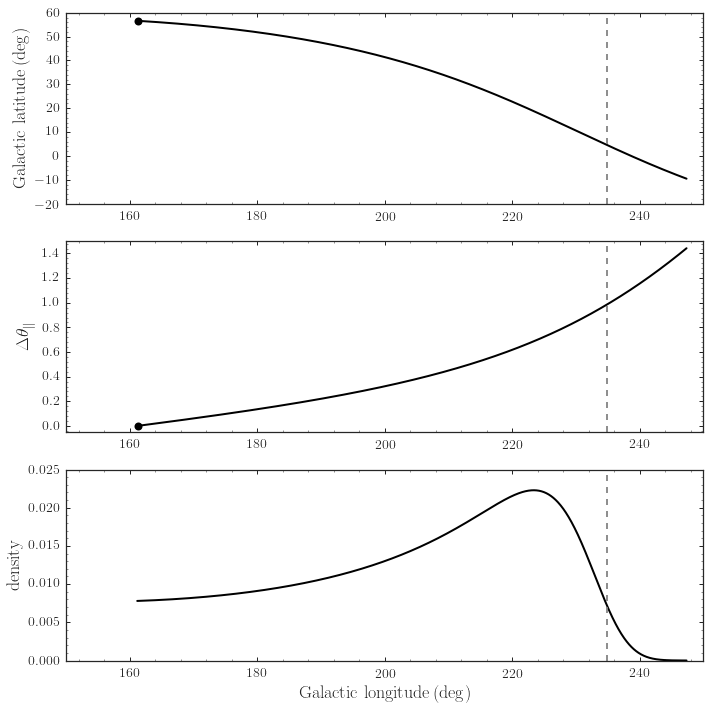

In [4]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(10,10)
subplot(3,1,1)
bovy_plot.bovy_plot(sdf_smooth._interpolatedObsTrackLB[:,0],
                   sdf_smooth._interpolatedObsTrackLB[:,1],
                   color='k',lw=2.,gcf=True,
                   ylabel=r'$\mathrm{Galactic\ latitude}\,(\mathrm{deg})$',
                   yrange=[-20.,60.],
                   xrange=[150.,250.])
plot(sdf_smooth._progenitor.ll(ro=R0),sdf_smooth._progenitor.bb(ro=R0),'ko',ms=8.)
axvline(numpy.interp(sdf_smooth.length(),
                     sdf_smooth._interpolatedThetasTrack,
                     sdf_smooth._interpolatedObsTrackLB[:,0]),
        linestyle='--',color='0.5')
subplot(3,1,2)
bovy_plot.bovy_plot(sdf_smooth._interpolatedObsTrackLB[:,0],
                   sdf_smooth._interpolatedThetasTrack,
                   color='k',lw=2.,gcf=True,
                   ylabel=r'$\Delta\theta_\parallel$',
                   yrange=[-0.05,1.5],
                   xrange=[150.,250.])
axvline(numpy.interp(sdf_smooth.length(),
                     sdf_smooth._interpolatedThetasTrack,
                     sdf_smooth._interpolatedObsTrackLB[:,0]),
        linestyle='--',color='0.5')
plot(sdf_smooth._progenitor.ll(ro=R0),0.,'ko',ms=8.)
subplot(3,1,3)
dens_l= numpy.array([sdf_smooth.density_par(x,coord='ll') for x in sdf_smooth._interpolatedThetasTrack])
bovy_plot.bovy_plot(sdf_smooth._interpolatedObsTrackLB[:,0],
                    dens_l/numpy.sum(dens_l
                                     *(numpy.roll(sdf_smooth._interpolatedObsTrackLB[:,0],-1)\
                                       -sdf_smooth._interpolatedObsTrackLB[:,0])),
                    color='k',lw=2.,gcf=True,
                    ylabel=r'$\mathrm{density}$',
                    xlabel=r'$\mathrm{Galactic\ longitude}\,(\mathrm{deg})$',
                    yrange=[0.,0.025],
                    xrange=[150.,250.])
axvline(numpy.interp(sdf_smooth.length(),
                     sdf_smooth._interpolatedThetasTrack,
                     sdf_smooth._interpolatedObsTrackLB[:,0]),
        linestyle='--',color='0.5')
tight_layout()
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2016-stream-stats','gd1like_props.pdf'))

Relative probability of impacts at different times:

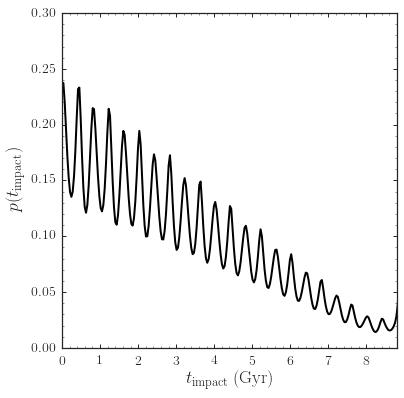

In [5]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(6,6)
times= numpy.array(sdf_pepper._uniq_timpact)*bovy_conversion.time_in_Gyr(V0,R0)
bovy_plot.bovy_plot(times,
                    numpy.array(sdf_pepper._ptimpact)/numpy.sum(sdf_pepper._ptimpact)/(times[1]-times[0]),
                    color='k',lw=2.,
                    xlabel=r'$t_{\mathrm{impact}}\,(\mathrm{Gyr})$',
                    ylabel=r'$p(t_{\mathrm{impact}})$',
                    xrange=[0.,8.8],
                    yrange=[0.,0.3])
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2016-stream-stats','gd1like_ptimpact.pdf'))